In [ ]:
# !pip install psycopg2
# !pip install psycopg2-binary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import psycopg2

## Connexion à la base de données

In [ ]:
conn = psycopg2.connect("dbname=prodkbdb user=testdata password=testData678341A host=prod-rds-db.cbijryjiwdgw.eu-west-3.rds.amazonaws.com port=5432")

## Chargement des données depuis la base de données

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("SELECT * FROM items")

In [ ]:
data = cur.fetchall()

In [ ]:
cur.close()

In [ ]:
print("Nombres de lignes",len(data))

Nombres de lignes 9269243


## Sauvegarde des données au format csv sur le disque

In [ ]:
import csv

In [ ]:
csv_file = open("dataset.csv", "w", newline="")
csv_writer = csv.writer(csv_file)

In [ ]:
cols_name = [desc[0] for desc in cur.description]

In [ ]:
cols_name

['id',
 'amount',
 'description',
 'date',
 'itemName',
 'parent',
 'quantity',
 'taxAmount',
 'taxDescription',
 'type',
 'storeId',
 'createdAt',
 'updatedAt',
 'taxRate']

In [ ]:
with open('data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(cols_name)
    for row in data:
        csv_writer.writerow(row)

## Chargement des données depuis le disque

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("data.csv", encoding="utf-8", parse_dates=['date'], quotechar='|')

In [ ]:
dataset.shape

(9269243, 14)

In [ ]:
dataset.columns

Index(['id', 'amount', 'description', 'date', 'itemName', 'parent', 'quantity',
       'taxAmount', 'taxDescription', 'type', 'storeId', 'createdAt',
       'updatedAt', 'taxRate'],
      dtype='object')

In [ ]:
dataset.describe(include="all",datetime_is_numeric=True)

,id,amount,description,date,itemName,parent,quantity,taxAmount,taxDescription,type,storeId,createdAt,updatedAt,taxRate
count,9269243,9.269243e+06,769986,0,9269172,0.0,0.0,9.269243e+06,9269243,520162,9269243,9269243,9269243,9.269243e+06
unique,9269243,NaN,18471,NaN,138579,NaN,NaN,NaN,28,2,1829,8526946,8526946,NaN
top,31ae2123-3e78-49c5-8643-ea5ed8b39b9a,NaN,product,NaN,frites,NaN,NaN,NaN,TVA 10 %,menu,b4f0da25-d6f8-4fcc-8333-be8dda441c89,2023-05-11 12:08:38.194000+00:00,2023-05-11 12:08:38.194000+00:00,NaN
freq,1,NaN,208539,NaN,149764,NaN,NaN,NaN,5054557,460161,95947,17,17,NaN
mean,NaN,1.585534e+01,NaN,NaT,NaN,NaN,NaN,-1.647671e+00,NaN,NaN,NaN,NaN,NaN,8.652704e+02
min,NaN,-1.560000e+02,NaN,NaT,NaN,NaN,NaN,-2.147484e+07,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.800000e+00,NaN,NaT,NaN,NaN,NaN,1.000000e-01,NaN,NaN,NaN,NaN,NaN,5.500000e+02
50%,NaN,4.000000e+00,NaN,NaT,NaN,NaN,NaN,3.200000e-01,NaN,NaN,NaN,NaN,NaN,1.000000e+03
75%,NaN,9.400000e+00,NaN,NaT,NaN,NaN,NaN,8.500000e-01,NaN,NaN,NaN,NaN,NaN,1.000000e+03
max,NaN,1.000000e+06,NaN,NaT,NaN,NaN,NaN,6.612000e+04,NaN,NaN,NaN,NaN,NaN,2.200000e+03


In [ ]:
dataset.head()

,id,amount,description,date,itemName,parent,quantity,taxAmount,taxDescription,type,storeId,createdAt,updatedAt,taxRate
0,31ae2123-3e78-49c5-8643-ea5ed8b39b9a,5.06,NaN,NaT,petit original,NaN,NaN,0.46,TVA 10 %,NaN,8f9c2de8-f6b5-4ca3-a86f-53b0250ca909,2023-06-01 18:51:04.712000+00:00,2023-06-01 18:51:04.712000+00:00,1000
1,464dbf37-5c85-48bb-b37d-61a9c42f2596,3.34,NaN,NaT,frites,NaN,NaN,0.30,TVA 10 %,NaN,8f9c2de8-f6b5-4ca3-a86f-53b0250ca909,2023-06-01 18:51:04.712000+00:00,2023-06-01 18:51:04.712000+00:00,1000
2,bcb85103-c507-4f79-8537-d90f93ff6d8b,6.50,NaN,NaT,menu tenders,NaN,NaN,0.60,TVA 10 %,NaN,b172c8cc-59b6-4ba7-a90d-fe0276018b30,2023-06-01 18:51:07.413000+00:00,2023-06-01 18:51:07.413000+00:00,1000
3,3f042675-0e18-499e-b36e-cde3bd6bffa0,9.01,NaN,NaT,samba basque,NaN,NaN,0.82,TVA 10 %,NaN,2279d78f-ae32-429f-b9d5-4205227d2ab8,2023-06-01 18:51:45.085000+00:00,2023-06-01 18:51:45.085000+00:00,1000
4,c09aca06-4bc8-4a08-b8f2-8158ee05961f,7.05,NaN,NaT,california chicken,NaN,NaN,0.37,TVA 5.5 %,NaN,a18c8820-f90c-4eeb-8944-cd5ba6185bbe,2023-06-01 18:51:45.945000+00:00,2023-06-01 18:51:45.945000+00:00,550


## EXPLORATION DES DONNEES

In [ ]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Valeurs uniques pour la colonne {column}:")
    print(unique_values)
    print()

Valeurs uniques pour la colonne id:
['31ae2123-3e78-49c5-8643-ea5ed8b39b9a'
 '464dbf37-5c85-48bb-b37d-61a9c42f2596'
 'bcb85103-c507-4f79-8537-d90f93ff6d8b' ...
 'f85c21ce-1bb8-4f18-aba7-ab8d7dc8e8d8'
 '6d7b3c3a-de7d-4f7a-a34f-efc4edfd7aba'
 '526179cd-54f9-403f-add2-272f0c5e47a8']

Valeurs uniques pour la colonne amount:
[  5.06   3.34   6.5  ... 159.54 146.36  -7.01]

Valeurs uniques pour la colonne description:
[nan '.'
 'boeuf grillé sauce maison accompagné nouilles somen, salade iceberg,  carotte, oignon rouge, tomate, menthe, pince de riz grillé.'
 ... 'sucre speculoos' 'ail des ours' '56393']

Valeurs uniques pour la colonne date:
['NaT']

Valeurs uniques pour la colonne itemName:
['petit original' 'frites' 'menu tenders' ... 'pasnde banane mais fraise'
 'starward nova' 'chevre remplace lardons']

Valeurs uniques pour la colonne parent:
[nan]

Valeurs uniques pour la colonne quantity:
[nan]

Valeurs uniques pour la colonne taxAmount:
[  0.46   0.3    0.6  ...  39.93 -49.83  62.84]

ON remarque deja que


*   certaines colonne ne contient que des valeurs manquantes(NAN, NAT): parent quantity et date
*   la colonne amount contient des valeurs negatives
*   Description , type, intemName, contient des valeurs manquantes
*   CreateAt et updateAt contient peut etre exatement les memes valeurs



In [ ]:
createdAt_values = dataset["createdAt"]
updatedAt_values = dataset["updatedAt"]

are_equal = createdAt_values.equals(updatedAt_values)

if are_equal:
    print("Les colonnes 'createdAt' et 'updatedAt' ont les mêmes valeurs.")
else:
    print("Les colonnes 'createdAt' et 'updatedAt' ont des valeurs différentes.")


Les colonnes 'createdAt' et 'updatedAt' ont les mêmes valeurs.


les colonnes createdAt et updatedAt ont exatement les memes valeurs et n'apporte pas d'informations croncrete

#### Vérification des types

In [ ]:
display(dataset.dtypes)

id                        object
amount                   float64
description               object
date              datetime64[ns]
itemName                  object
parent                   float64
quantity                 float64
taxAmount                float64
taxDescription            object
type                      object
storeId                   object
createdAt                 object
updatedAt                 object
taxRate                    int64
dtype: object

Les types de createAt et updateAt sont à modifier.

#### Vérification des valeurs manquantes

In [ ]:
dataset.isnull().sum()

id                      0
amount                  0
description       8499257
date              9269243
itemName               71
parent            9269243
quantity          9269243
taxAmount               0
taxDescription          0
type              8749081
storeId                 0
createdAt               0
updatedAt               0
taxRate                 0
dtype: int64

In [ ]:
(dataset.isnull().sum() / dataset.shape[0]) * 100

id                  0.000000
amount              0.000000
description        91.693108
date              100.000000
itemName            0.000766
parent            100.000000
quantity          100.000000
taxAmount           0.000000
taxDescription      0.000000
type               94.388301
storeId             0.000000
createdAt           0.000000
updatedAt           0.000000
taxRate             0.000000
dtype: float64

- 91% des descripions manques
- 94% des types manques
- confirmation des observations pour les valeurs manquantes des variables dat, parent, quantity(100%) de valeurs manquantes





VISUALISATION DES VALEURS DE LA COLONNES

#### Vérification des valeurs des colonnes

In [ ]:
dataset.nunique()

id                9269243
amount               9730
description         18471
date                    0
itemName           138579
parent                  0
quantity                0
taxAmount            6182
taxDescription         28
type                    2
storeId              1829
createdAt         8526946
updatedAt         8526946
taxRate                27
dtype: int64

In [ ]:
dataset.taxRate.unique()

array([1000,  550,    0, 2000,  850,  210,  600,  300, 2100,  250,  450,
       1600, 1200,  100,   21, 1300,  770,  105, 1500, 1140, 1961,  700,
         20,  217, 2200, 1400, 1700])

##### description

In [ ]:
dataset.description

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
9269238    NaN
9269239    NaN
9269240    NaN
9269241    NaN
9269242    NaN
Name: description, Length: 9269243, dtype: object

In [ ]:
dataset.description.value_counts()

product                                        208539
message generique                               53691
.                                               22805
menu                                            14255
viande                                          10083
                                                ...  
vente a emporter au crossfit                        1
nid d'oiseau? sauce tomate? hv?pdt duchesse         1
poules de paques                                    1
infusion classic                                    1
56393                                               1
Name: description, Length: 18471, dtype: int64

In [ ]:
dataset.description.unique().sum

<function ndarray.sum>

In [ ]:
top_10_descriptions = dataset['description'].value_counts().head(10)
print(top_10_descriptions)


product                   208539
message generique          53691
.                          22805
menu                       14255
viande                     10083
cafe                       10027
crepes                      7543
moyen 450ml bubble tea      5288
gaufres                     4395
grand 650ml bubble tea      3397
Name: description, dtype: int64


##### itemName

In [ ]:
dataset.itemName

0                     petit original
1                             frites
2                       menu tenders
3                       samba basque
4                 california chicken
                     ...            
9269238         cali poulet teriyaki
9269239                    saucisson
9269240        chérie des îles kirch
9269241    yakitori chicken barbecue
9269242                menu sandwich
Name: itemName, Length: 9269243, dtype: object

In [ ]:
dataset.itemName.value_counts()[:20]

frites                      149764
baguette                     61739
california saumon avocat     58362
sauce sucrée offerte         52230
cafe                         49110
frites 🍟                     48711
french fries                 46908
expresso                     44790
frais de gestion             43207
sauce salée offerte          42658
soupe miso                   39068
croissant                    38992
coca cola                    38419
salmon dream                 35521
burrito                      33346
tradition                    31819
salade de chou               31429
gyoza poulet                 31062
wasabi offert                28927
fondant cheese               28386
Name: itemName, dtype: int64

In [ ]:
dataset.itemName.unique()

array(['petit original', 'frites', 'menu tenders', ...,
       'pasnde banane mais fraise', 'starward nova',
       'chevre remplace lardons'], dtype=object)

##### type

In [ ]:
dataset.type

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
9269238    NaN
9269239    NaN
9269240    NaN
9269241    NaN
9269242    NaN
Name: type, Length: 9269243, dtype: object

In [ ]:
dataset.type.value_counts()

menu    460161
dish     60001
Name: type, dtype: int64

- 2 valeurs possibles (menu ou dish°
- Tous les items ne possèdent pas de type

## TRAITEMENT DES VALEURS MANQUANTES

### visualisation des valeurs manquantes

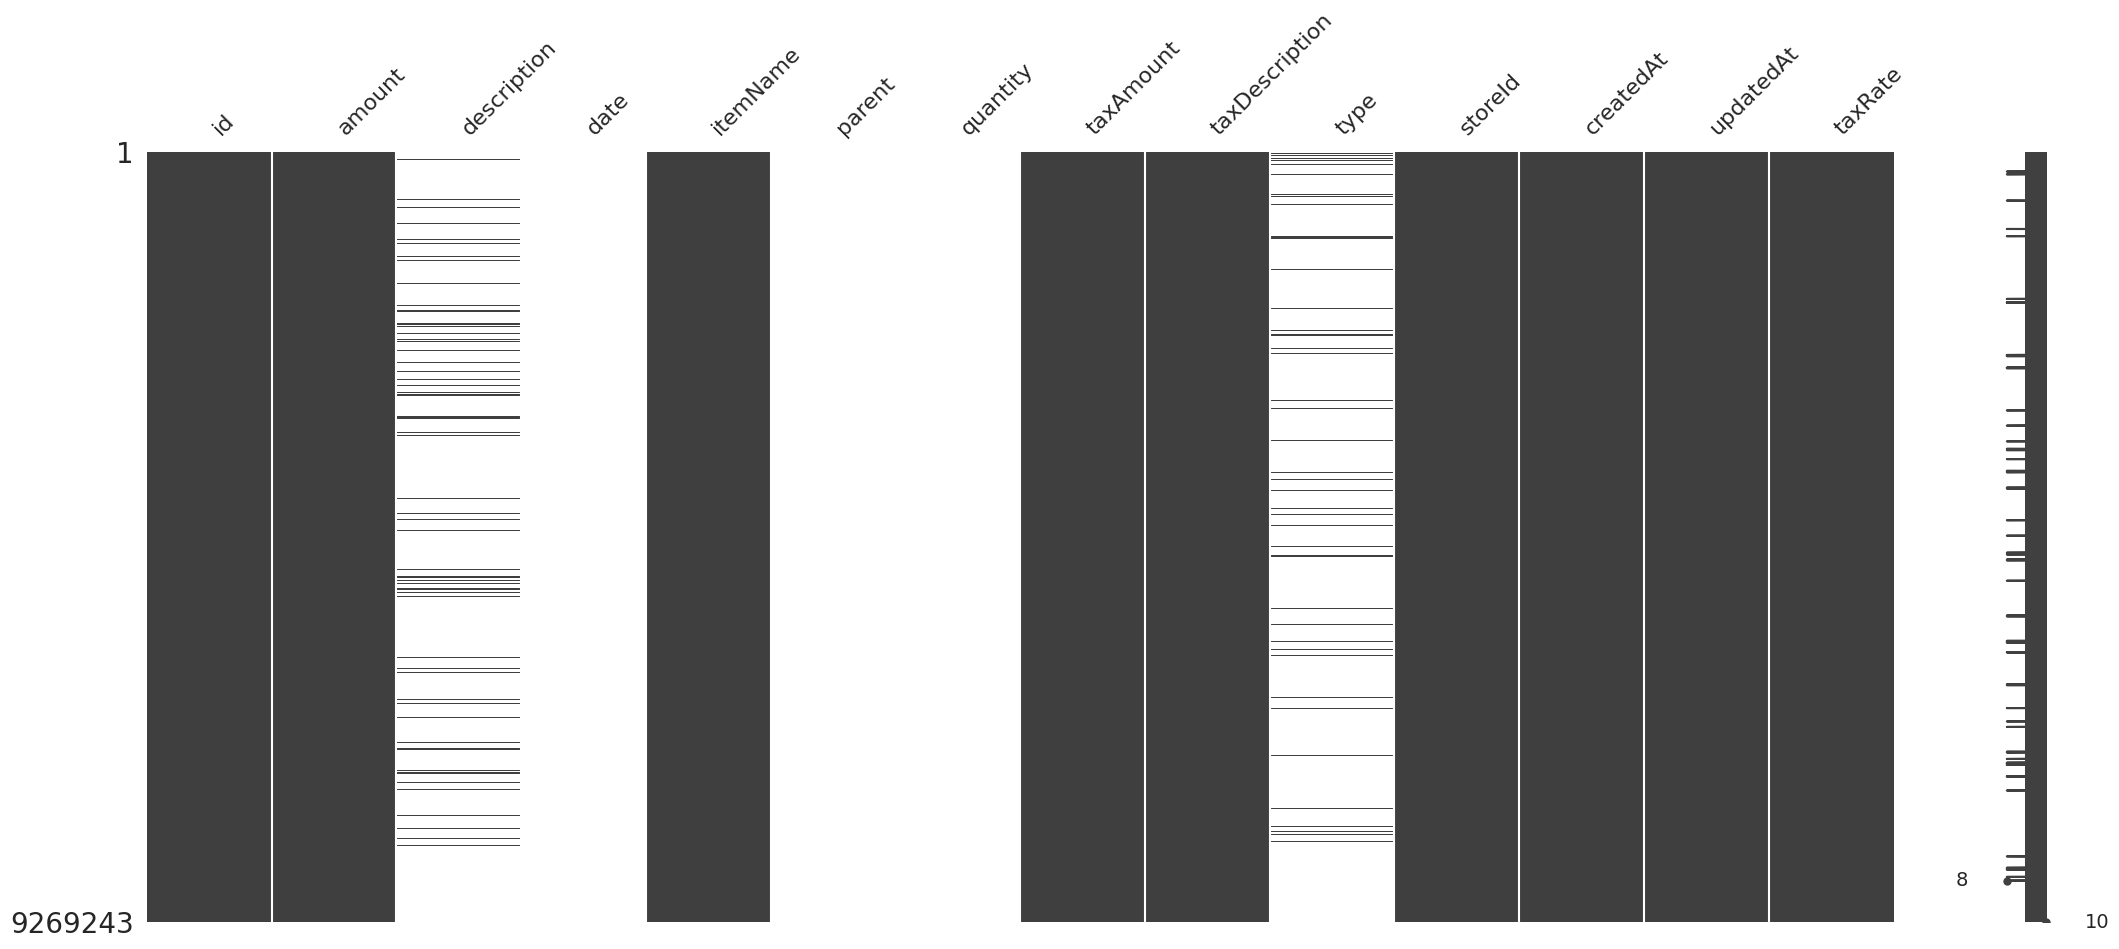

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Affichage du graphe des valeurs manquantes
msno.matrix(dataset)
plt.show()

cette visualisation conforte nos observations sur les donnees manquantes de data type et quantité.

nous remarquons aussi une tres grande quantite de valeurs pour description et type

### Visualisation des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing

warnings.simplefilter(action='ignore')
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

Description et type (Bar chart)

In [ ]:
# # Compter les occurrences de chaque description ou type
# description_counts = dataset['description'].value_counts()
# type_counts = dataset['type'].value_counts()

# # Créer le graphique en barres
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.bar(description_counts.index, description_counts.values)
# plt.xlabel('Description')
# plt.ylabel('Occurrences')

# plt.subplot(2, 1, 2)
# plt.bar(type_counts.index, type_counts.values)
# plt.xlabel('Type')
# plt.ylabel('Occurrences')

# plt.tight_layout()
# plt.show()


taxRate

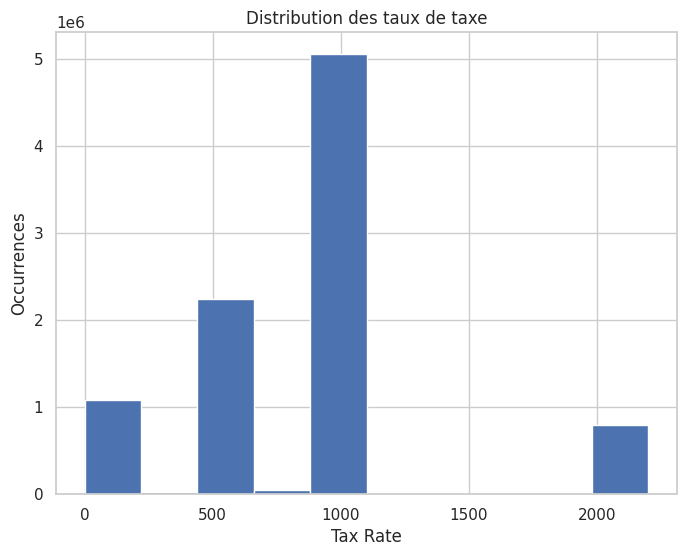

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['taxRate'], bins=10)  # Vous pouvez ajuster le nombre de bins selon vos données
plt.xlabel('Tax Rate')
plt.ylabel('Occurrences')
plt.title('Distribution des taux de taxe')
plt.show()


taxAmount

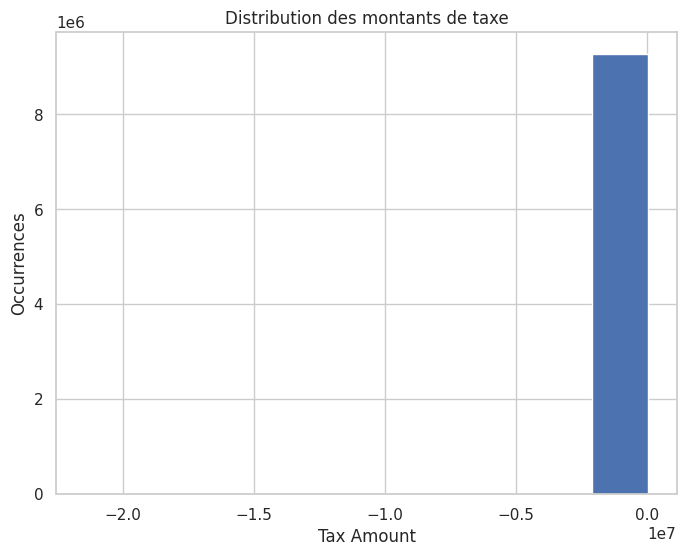

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['taxAmount'], bins=10)  # Vous pouvez ajuster le nombre de bins selon vos données
plt.xlabel('Tax Amount')
plt.ylabel('Occurrences')
plt.title('Distribution des montants de taxe')
plt.show()


pairplot

In [ ]:
# import seaborn as sns

# # Sélectionner les colonnes numériques pertinentes
# numeric_columns = ['amount','taxRate', 'taxAmount']

# # Créer un sous-ensemble de données avec les colonnes numériques
# numeric_data = dataset[numeric_columns]

# # Tracer le pair plot
# sns.pairplot(numeric_data)
# plt.show()


étude de la correlation

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculer la matrice de corrélation
# correlation_matrix = dataset.corr()

# # Tracer la matrice de corrélation avec une heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Matrice de corrélation')
# plt.show()


### suppression des valeurs manquantes

la variable description presente énormément de valeurs manquantes et plusieurs valeurs uniques.
vu sa nature catégorielle son imputation par le mode ou tout autres valeurs peut causer d'enormes erreurs de classification. de plus le nom des articles constitue en lui meme une description des articles et est utiliser comme description dans plusieurs lignes.
il en est de meme pour type qui possede enormement de valeur manquante nous allons donc dans un premier temps supprimer ces deux varialbles

In [ ]:
dataset.drop('description', axis=1, inplace=True)
dataset.drop('type', axis=1, inplace=True)


la variable itemName possedent tres peux de valeurs manquantes 67 sur un jeux de donn"es de plus pe 9000000 de lignes ce nombre etant insignifiant nous avons decider de les supprimer

In [ ]:
dataset = dataset.dropna(subset=['itemName'])

observons les valeurs negative de amount

In [ ]:
dataset.loc[dataset.amount<0]

,id,amount,date,itemName,parent,quantity,taxAmount,taxDescription,storeId,createdAt,updatedAt,taxRate
1455,a486b067-054f-4e11-8d0b-8c2daad3b7ad,-3.0,NaT,remise,NaN,NaN,-0.27,TVA 10 %,f093962a-42b3-4156-884a-fb775ccab4f2,2023-06-01 19:04:12.584000+00:00,2023-06-01 19:04:12.584000+00:00,1000
9949,79a7fee1-b60e-455e-9900-ab730b636f6d,-2.5,NaT,remise - lot athena sans images,NaN,NaN,-0.13,TVA 5.5 %,947dafe4-ca2d-472c-8b79-181b87d31cc3,2023-06-02 14:04:40.733000+00:00,2023-06-02 14:04:40.733000+00:00,550
11008,330c2f3e-58da-485a-9558-122a1a52cf11,-0.5,NaT,sans frite,NaN,NaN,-0.04,TVA 10 %,b172c8cc-59b6-4ba7-a90d-fe0276018b30,2023-06-01 19:50:32.462000+00:00,2023-06-01 19:50:32.462000+00:00,1000
18018,760706c4-57e2-4c89-9a71-e73ed1122460,-6.9,NaT,discount,NaN,NaN,0.00,TVA 0 %,eb879363-89f7-4dce-956f-a41aaf455c39,2023-06-01 20:47:56.029000+00:00,2023-06-01 20:47:56.029000+00:00,0
19789,22597aba-611e-4a2e-a29d-94bc748e37a5,-1.0,NaT,sans boisson,NaN,NaN,-0.09,TVA 10 %,b172c8cc-59b6-4ba7-a90d-fe0276018b30,2023-06-02 13:10:18.870000+00:00,2023-06-02 13:10:18.870000+00:00,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
9262462,4dcf5854-44f9-4a91-8dda-cbf1b6e0fca8,-4.2,NaT,matcha,NaN,NaN,-0.22,TVA 5.5 %,637ef15e-7835-41d0-bab8-3fc2bde9885a,2023-06-01 18:26:08.328000+00:00,2023-06-01 18:26:08.328000+00:00,550
9266694,ea3896b7-cf13-46d9-8551-a0502a62e7c7,-1.0,NaT,point fidelite internet,NaN,NaN,-0.36,TVA 10 %,fbe1f03d-6e87-477b-948d-edeb515c574d,2023-06-01 18:51:01.948000+00:00,2023-06-01 18:51:01.948000+00:00,1000
9267455,607d23b7-f686-40c7-ab0f-2e915d1483bb,-1.0,NaT,sans boisson,NaN,NaN,-0.09,TVA 10 %,b172c8cc-59b6-4ba7-a90d-fe0276018b30,2023-06-01 19:06:29.387000+00:00,2023-06-01 19:06:29.387000+00:00,1000
9267574,c2a0ae1a-08a1-4004-b65b-320a0e282e19,-1.0,NaT,retour consigne,NaN,NaN,0.00,noTaxDescription,4a98d79a-936f-421d-ade9-7bcd55779bac,2023-06-01 18:48:52.109000+00:00,2023-06-01 18:48:52.109000+00:00,0


Apres observations on remarques que les valeurs negatives sont des remises suredes articles . on va donc les supprimer vu que ce ne sont pas des articles

In [ ]:
dataset = dataset.loc[dataset.amount>=0].reset_index()

le nombre de valeur negative est tres faibles en comparaisont aux donnee de notre dataset de plus elle corrrespondent le plus souvent a des remises . nous allons donc les supprimer

In [ ]:
dataset.loc[dataset.taxAmount<0]

,index,id,amount,date,itemName,parent,quantity,taxAmount,taxDescription,storeId,createdAt,updatedAt,taxRate
1448,1448,b96241be-ee93-4c84-b837-de6a657271ce,20.99,NaT,remise,NaN,NaN,-1.90,TVA 10 %,6fe2d6c6-1dfc-48ba-b171-127c24536970,2023-06-01 19:02:38.809000+00:00,2023-06-01 19:02:38.809000+00:00,1000
4144,4145,4afc2842-8468-4854-9d1b-f596ff3a231e,17.99,NaT,remise,NaN,NaN,-1.63,TVA 10 %,6fe2d6c6-1dfc-48ba-b171-127c24536970,2023-06-01 19:15:00.438000+00:00,2023-06-01 19:15:00.438000+00:00,1000
7814,7815,972a86f5-e466-4c15-9acf-de8b0c07a6e7,5.60,NaT,bud 50cl,NaN,NaN,-0.93,TVA 20 %,890c58ef-ce6e-410a-805f-e5dfbbc06d0b,2023-06-01 19:26:54.149000+00:00,2023-06-01 19:26:54.149000+00:00,2000
7871,7872,de3cad2a-feef-4c7e-bd2b-ca0a8dd02640,12.40,NaT,33 camembertoise,NaN,NaN,-1.12,TVA 10 %,890c58ef-ce6e-410a-805f-e5dfbbc06d0b,2023-06-01 19:26:54.151000+00:00,2023-06-01 19:26:54.151000+00:00,1000
8994,8995,3dbe65f6-9140-41e4-b718-b41dff1dc1e5,1.71,NaT,fanta,NaN,NaN,-0.09,TVA 6 %,90fdf950-f3b6-4fb1-868c-5d4784dc5bff,2023-06-01 20:51:17.722000+00:00,2023-06-01 20:51:17.722000+00:00,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256206,9263396,7bd9ea6d-7105-4279-8af7-6c615d2b1d0c,17.99,NaT,remise,NaN,NaN,-1.63,TVA 10 %,6fe2d6c6-1dfc-48ba-b171-127c24536970,2023-06-01 18:27:36.111000+00:00,2023-06-01 18:27:36.111000+00:00,1000
9258019,9265209,9b93c1c8-af64-479e-af19-98f9c074eb5f,17.99,NaT,remise,NaN,NaN,-1.63,TVA 10 %,6fe2d6c6-1dfc-48ba-b171-127c24536970,2023-06-01 18:39:16.745000+00:00,2023-06-01 18:39:16.745000+00:00,1000
9259107,9266297,8152d808-8e47-4f66-8b59-60085e3948da,4.79,NaT,remise,NaN,NaN,-0.43,TVA 10 %,203f97de-28bd-4577-9202-a5b63fd706ef,2023-06-01 18:44:29.966000+00:00,2023-06-01 18:44:29.966000+00:00,1000
9261314,9268508,93560df2-17d8-4cac-989a-2158736eb81c,3.85,NaT,remise,NaN,NaN,-0.34,TVA 10 %,203f97de-28bd-4577-9202-a5b63fd706ef,2023-06-01 19:00:30.761000+00:00,2023-06-01 19:00:30.761000+00:00,1000


In [ ]:
dataset = dataset.loc[dataset.taxAmount>=0].reset_index()

reetudions la correlation

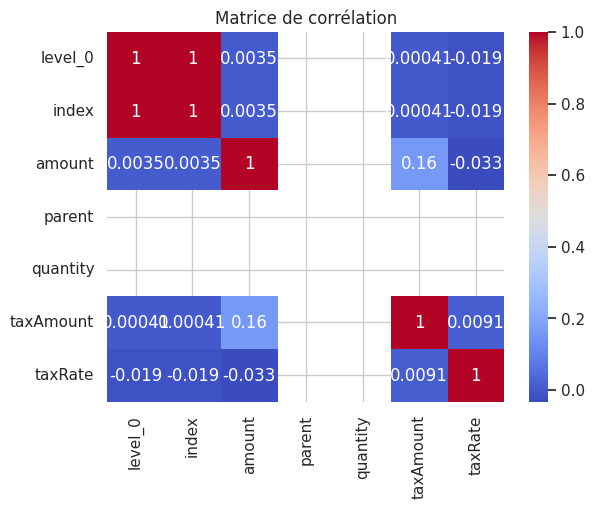

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = dataset.corr()

# Tracer la matrice de corrélation avec une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


### etude des relations entre les données

### correlation

# SELECTION DES COLONES UTILES

Les variables avec 100% de valeurs manquantes on ete suprimet ainsi qe que les colonnes createAt et updateAt
la colonne taxDescription est aussi supprimer car taxrate apporte les meme information qu'elle.

In [ ]:
# features_cols = ["amount","itemName","taxAmount","type","taxRate"]
features_cols = ["amount","itemName","taxAmount","taxRate"]

In [ ]:
dataset2 = dataset[features_cols]

# MODELE ET CLUSTERING AVEC LES 40000 lignes

In [ ]:
batch_size = 1000
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import sklearn
import re

In [ ]:
dataset2.shape

(9240982, 4)

In [ ]:
dataset2 = dataset2.drop_duplicates(subset=["amount", "itemName", "taxAmount",  "taxRate"], ignore_index=True)

In [ ]:
dataset2.shape

(634417, 4)

In [ ]:

import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import sklearn


# Sélection des colonnes nécessaires pour la classification
features_cols = ["amount", "itemName", "taxAmount", "taxRate"]


nous allons travaille sur 60000  car ne disposant pas malgre l'aplication de technique de travail sur de grands volume de données des ressources neccessaire;

MODELE

Meilleur K sélectionné: 6


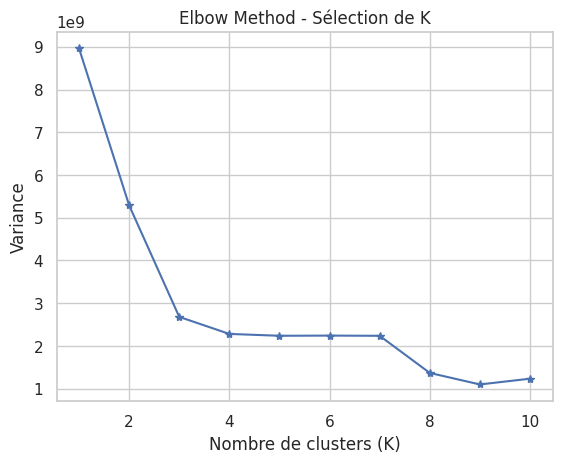

In [ ]:

num_rows_to_keep = 60000
# Échantillonnage aléatoire pour sélectionner un sous-ensemble du dataset
sampled_dataset = dataset.sample(n=num_rows_to_keep, random_state=42)
dataset2 = sampled_dataset[features_cols]

#  Nettoyage du texte dans la colonne "itemName"
dataset2['cleaned_itemName'] = dataset2['itemName'].apply(lambda x: re.sub(r'[^\w\s\d]|_', '', x).strip())
dataset2['cleaned_itemName'] = dataset2['cleaned_itemName'].str.replace(r'\(x\d+\)', '')
dataset2 = dataset2.drop_duplicates(subset=["amount", "itemName", "taxAmount",  "taxRate"], ignore_index=True)
###################""
####################"
X_train, X_test = sklearn.model_selection.train_test_split(dataset2, test_size=0.1)

# Extraction des caractéristiques avec TF-IDF
vectorizer = TfidfVectorizer()
itemName_features = vectorizer.fit_transform(X_train['cleaned_itemName'])

# Concaténation des caractéristiques et des autres variables
extra_features = X_train[['amount', 'taxAmount', 'taxRate']].values
all_features = np.concatenate([itemName_features.toarray(), extra_features], axis=1)

# Sélection du meilleur K en utilisant l'Elbow Method
max_k = 10  # Nombre maximal de clusters à tester
batch_size = 1000  # Taille du mini-batch
variances = []

for k in range(1, max_k+1):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
    kmeans.fit(all_features)
    variances.append(kmeans.inertia_)

# Sélection du meilleur K en examinant le coude dans la courbe
best_k = 1
for i in range(1, len(variances)-1):
    diff1 = variances[i] - variances[i-1]
    diff2 = variances[i+1] - variances[i]
    if diff2 < diff1:
        best_k = i + 1
        break

print("Meilleur K sélectionné:", best_k)

# Tracer la courbe de variance en fonction de K
plt.plot(range(1, max_k+1), variances, 'b*-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Variance')
plt.title('Elbow Method - Sélection de K')
plt.show()


In [ ]:
# Clustering avec le meilleur K
best_k= 4
kmeans = MiniBatchKMeans(n_clusters=best_k, batch_size=batch_size, random_state=42)
kmeans.fit(all_features)

# Assignation des clusters aux articles
X_train['cluster_label'] = kmeans.labels_

# Affichage des résultats des clusters
print("Résultats du clustering :")
print(X_train[['itemName', 'cluster_label']])


Résultats du clustering :
                         itemName  cluster_label
23495              safran 8 parts              1
11611                   riz pilau              0
18552                  biscuits 2              1
5038              pint 50cl brune              3
3665                         pago              0
...                           ...            ...
6551              2 survivor buns              0
2097                 loaded fries              0
23469                 grim blonde              3
2901                       quiche              0
19645  chirashi tartare de saumon              0

[28181 rows x 2 columns]


OBSERVONS LES DONNES

In [ ]:
X_train.loc[X_train.cluster_label==1].itemName.unique()


array(['safran 8 parts', 'biscuits 2', 'glace pistache 500ml', ...,
       'ksefasi  olives noires gold800gr', '🍋 citron limonade',
       'entremet 4pers'], dtype=object)

In [ ]:
X_train.loc[X_train.cluster_label==2].itemName.unique()


array(['moelleux chocolat', 'jus local', 'maryland bleu 25', ...,
       'salade poulet', 'jus tranche papaye', 'pain berbère'],
      dtype=object)

In [ ]:
X_train.loc[X_train.cluster_label==3].itemName.unique()


array(['pint 50cl brune', 'long island', 'hoegaarden 50cl', ...,
       '1,5 blanche des neiges', 'pic saint loup', 'grim blonde'],
      dtype=object)

In [ ]:
X_train.loc[X_train.cluster_label==4].itemName.unique()


array([], dtype=object)

De l'observation des des cluster en fonction des taux on remarque le groupe de taux pour chaque cluster est different

In [ ]:
X_train.loc[X_train.cluster_label==3].describe()

,amount,taxAmount,taxRate,cluster_label
count,3151.000000,3151.000000,3151.000000,3151.0
mean,9.352076,1.878056,1999.714376,3.0
std,20.237141,4.014999,26.724597,0.0
min,0.000000,0.000000,1500.000000,3.0
25%,3.800000,0.670000,2000.000000,3.0
50%,5.630000,1.020000,2000.000000,3.0
75%,9.000000,1.830000,2000.000000,3.0
max,780.000000,130.000000,2200.000000,3.0


FONCTION classify_item

In [ ]:
# Mapping des clusters aux catégories
category_mapping = {

    0: "Catégorie A",
    1: "Catégorie B",
    2: "Catégorie C",
    3: "Catégorie D",
    # Ajoutez les autres catégories et leurs mappings ici
}

# Fonction de classification d'un item
def classify_item(item_name, amount, tax_amount, tax_rate):
    cleaned_item = re.sub(r'[^\w\s\d]|_', '', item_name).strip()
    item_features = vectorizer.transform([cleaned_item])
    item_all_features = np.concatenate([item_features.toarray(), [[amount, tax_amount, tax_rate]]], axis=1)
    predicted_cluster = kmeans.predict(item_all_features)
    category = category_mapping.get(predicted_cluster[0], "Catégorie inconnue")
    return category


test

In [ ]:
#  Exemple d'utilisation de la fonction de classification
# Test de classificatio
item_name = "	pot glace 1b"
amount = 3.50
tax_amount = 0.32
tax_rate = 1000
category = classify_item(item_name, amount, tax_amount, tax_rate)
print("Catégorie associée à l'item :", category)

Catégorie associée à l'item : Catégorie A


In [ ]:
# Test de classification
item_name = "	ginger ale"
amount = 5.00
tax_amount = 0.00
tax_rate = 0
category = classify_item(item_name, amount, tax_amount, tax_rate)
print("Catégorie associée à l'item :", category)


Catégorie associée à l'item : Catégorie C


In [ ]:
# Test de classification
item_name = "	fried chicken - m 🍗🍗"
amount = 5.00
tax_amount = 0.00
tax_rate = 0
category = classify_item(item_name, amount, tax_amount, tax_rate)
print("Catégorie associée à l'item :", category)


Catégorie associée à l'item : Catégorie C


In [ ]:
# Test de classification
item_name = "	fried chicken - m 🍗🍗"
amount = 11.00
tax_amount = 1.00
tax_rate = 1000
category = classify_item(item_name, amount, tax_amount, tax_rate)
print("Catégorie associée à l'item :", category)


Catégorie associée à l'item : Catégorie A


In [ ]:
# Test de classification
item_name = "frites"
amount = 5.99
tax_amount = 1.2
tax_rate = 0.2
category = classify_item(item_name, amount, tax_amount, tax_rate)
print("Catégorie associée à l'item :", category)


Catégorie associée à l'item : Catégorie C


extraction du modele

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as fichier:
    pickle.dump(kmeans, fichier)


In [ ]:
with open('vectorizer.pkl', 'wb') as fichier:
    pickle.dump(vectorizer, fichier)